![Imgur](https://i.imgur.com/VryXoBw.png)

## ①　Introduction
This is an information about an avid golf player (Player A) who has been playing golf regularly for years. (Of course not everyday!)

🎯　Your goal is to make a prediction of whether the value of the column`Play_A` is 0 or 1. 

You are free to add/remove sections and made any modification to this notebook. Only your final submission will be graded. This notebook will not be graded.

In this notebook, you will mainly work on Section ④ (Preprocessing) and Section ⑦ (Model Building).

* The dataset can be imported from Kaggle using the following API command:
    `kaggle competitions download -c prediction-of-golf-play-based-on-weather-condition`

## ②　Setting Up the Environment
These are all the libraries used in the lecture.

In [1]:
# Basic Libraries (L1)
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing (L2)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Data Exploration (L3)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm, expon, uniform, gamma
from scipy.stats import probplot, chi2_contingency

# Basic Classifiers & Regressors (L4-5)
from sklearn.linear_model import LogisticRegression,     LinearRegression, Lasso, Ridge
from sklearn.naive_bayes  import BernoulliNB,            GaussianNB
from sklearn.neighbors    import KNeighborsClassifier,   KNeighborsRegressor
from sklearn.dummy        import DummyClassifier,        DummyRegressor
from sklearn.tree         import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm          import SVC,                    SVR

# Ensemble Classifiers & Regressors (L6)
from sklearn.ensemble     import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble     import RandomForestClassifier,     RandomForestRegressor
from sklearn.ensemble     import StackingClassifier,         StackingRegressor
from sklearn.ensemble     import AdaBoostClassifier,         AdaBoostRegressor
from sklearn.ensemble     import BaggingClassifier,          BaggingRegressor
from sklearn.ensemble     import VotingClassifier,           VotingRegressor
from catboost             import CatBoostClassifier,         CatBoostRegressor
import lightgbm as lgb
import xgboost  as xgb

# Classification & Regression Metrics (L7)
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics      import confusion_matrix
from sklearn.metrics      import roc_curve, roc_auc_score
from sklearn.metrics      import mean_squared_error, mean_absolute_error
from sklearn.metrics      import median_absolute_error, mean_squared_log_error
from sklearn.metrics      import r2_score

# Model Calibration (L7)
from sklearn.calibration  import calibration_curve
from sklearn.metrics      import brier_score_loss, log_loss

# Model Selection & Validation (L7)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

# Hyperparameter Optimization (L7)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt                   import BayesSearchCV
from skopt.space             import Real, Categorical, Integer

# Multiclass Classification (L8)
from sklearn.multiclass      import OneVsOneClassifier,    OneVsRestClassifier
from sklearn.metrics         import classification_report, precision_recall_fscore_support

# Model Weighting (L8)
from sklearn.utils.class_weight import compute_sample_weight

# Resampling Techniques (L8)
from imblearn.over_sampling  import RandomOverSampler,  SMOTE,    ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.combine        import SMOTEENN

## ③　Data Loading
Note that the target values of the test data is missing (NaN). This is hidden from you and your job is to predict them.

In [2]:
# Load the dataset
train_url = "/kaggle/input/prediction-of-golf-play-based-on-weather-condition/train.csv"
test_url  = "/kaggle/input/prediction-of-golf-play-based-on-weather-condition/test.csv"

df_train = pd.read_csv(train_url, index_col=0)
df_test = pd.read_csv(test_url, index_col=0)

df = pd.concat([df_train,df_test], axis=0)

df

,Weekday,Month,Season,Holiday,Temperature,Humidity,Windy,Outlook,Crowdedness,Play_A
Date,,,,,,,,,,
2021-01-01,4,Jan,Winter,1,3.3,49.0,1,sunny,0.73,1.0
2021-01-02,5,Jan,Winter,0,2.9,53.0,0,sunny,0.74,1.0
2021-01-03,6,Jan,Winter,0,2.3,58.0,0,overcast,0.70,0.0
2021-01-04,0,Jan,Winter,0,3.0,45.0,0,overcast,0.61,0.0
2021-01-05,1,Jan,Winter,0,3.1,31.0,1,sunny,0.52,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2,Dec,Winter,0,7.1,48.0,1,sunny,0.60,NaN
2023-12-28,3,Dec,Winter,0,6.6,55.0,0,overcast,0.60,NaN
2023-12-29,4,Dec,Winter,0,6.3,30.0,1,overcast,0.67,NaN


## ④　Combined Preprocessing

In [3]:
# Preprocess the Dataset here. 
df = pd.get_dummies(df) # Converting categorical to dummies (to get you started!)

## ⑤　Exploratory Data Analysis

           Weekday      Holiday  Temperature     Humidity        Windy  \
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000   
mean      3.005479     0.044749    13.435525    61.525114     0.507763   
std       2.001363     0.206846     8.043321    14.435162     0.500168   
min       0.000000     0.000000    -2.000000    18.000000     0.000000   
25%       1.000000     0.000000     6.000000    52.000000     0.000000   
50%       3.000000     0.000000    13.800000    61.000000     1.000000   
75%       5.000000     0.000000    20.500000    72.000000     1.000000   
max       6.000000     1.000000    29.500000    99.000000     1.000000   

       Crowdedness      Play_A  
count  1095.000000  730.000000  
mean      0.620721    0.202740  
std       0.150474    0.402316  
min       0.000000    0.000000  
25%       0.530000    0.000000  
50%       0.630000    0.000000  
75%       0.720000    0.000000  
max       1.000000    1.000000  


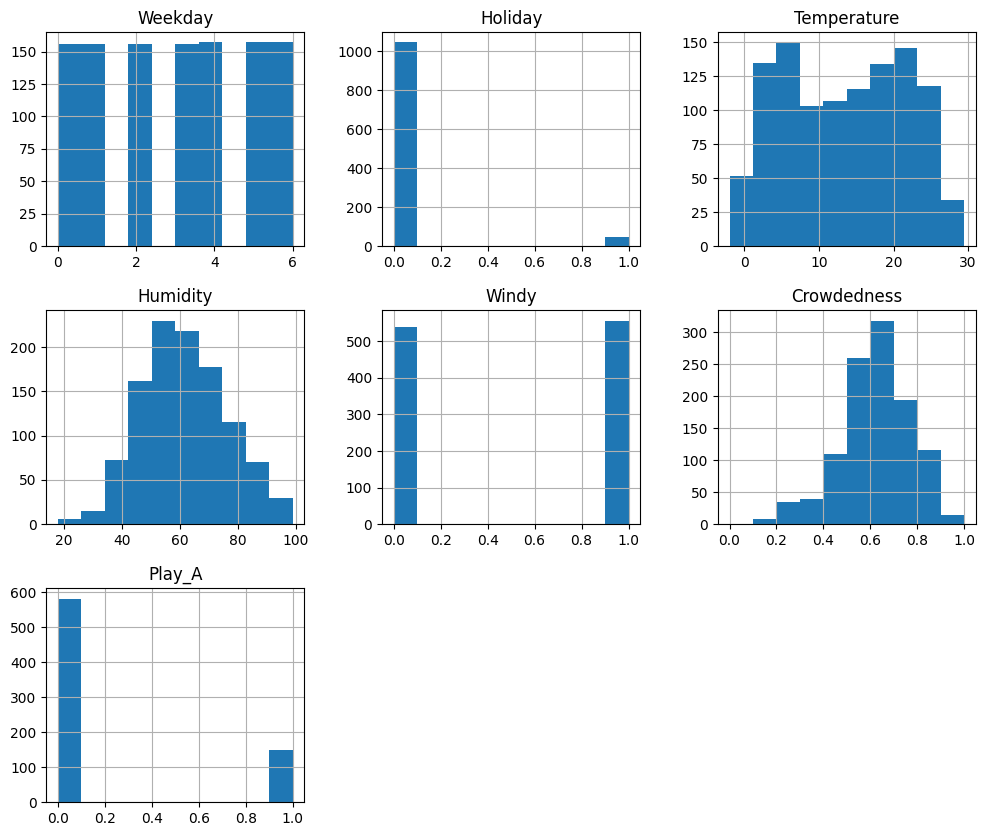

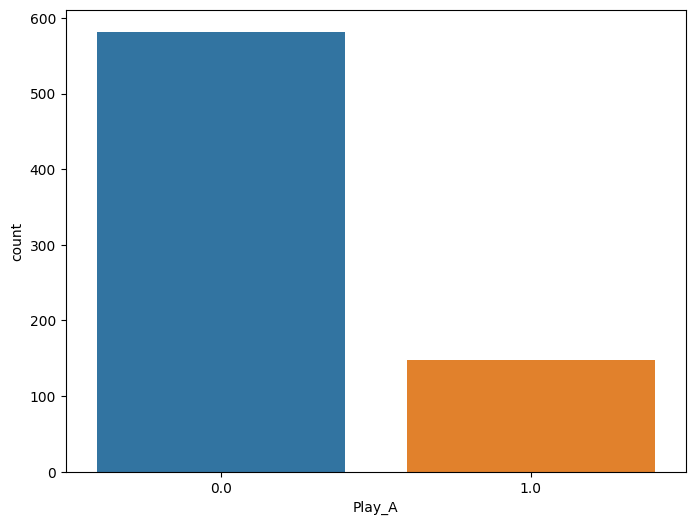

In [4]:
# Perform EDA here. (If you're too lazy, you can skip this.)
# Basic Overview of our data
print(df.describe())

# Data Distribution - Histograms
df.hist(figsize=(12, 10))
plt.show()

# Target Variable Analysis (if applicable)
# For example, assuming 'target_variable' is your target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Play_A', data=df)
plt.show()

## ⑦　Data Splitting for Modeling
Training data: Rows where `Play_A` is not missing.
Testing data: Rows where `Play_A` is missing.

In [5]:
# Split the processed data back into training and testing sets.
df_train = df[df['Play_A'].notna()]
df_test = df[df['Play_A'].isna()]

X_train, y_train = df_train.drop('Play_A', axis=1), df_train['Play_A']
X_test = df_test.drop('Play_A', axis=1)

## ⑧　Model Building
Perform your model building, evaluation, validation, and hyperparameter tuning here.

In [6]:
# Define & fit the classifier model
# Define & fit the model
clf = VotingClassifier(estimators=[
                                ('knn', KNeighborsClassifier(n_neighbors=3)),
                                ('dt', DecisionTreeClassifier(max_depth=3)),
                                ('lr', LogisticRegression(C=0.1)),
                                ('brn', BernoulliNB()),
                                ('svc', SVC()),
                                ('ada', AdaBoostClassifier())
                              ])
clf.fit(X_train, y_train)

# Perform cross-validation to check Performance
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')

# Evaluate the model
print(f"Precision: {scores.mean().round(3)} ± {2*scores.std().round(3)}" )

Precision: 0.99 ± 0.04


## ⑨　Making Predictions on Test Data 

In [7]:
# Make Prediction of the Unseen Data
y_pred = clf.predict(X_test)

## ⑩　Submitting the Prediction

In [8]:
# Make DataFrame for Submission
submission = pd.DataFrame(y_pred, index=df_test.index, columns=['Play_A'])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

submission

,Play_A
Date,
2023-01-01,0.0
2023-01-02,0.0
2023-01-03,0.0
2023-01-04,0.0
2023-01-05,0.0
...,...
2023-12-27,0.0
2023-12-28,0.0
2023-12-29,0.0
